<a href="https://colab.research.google.com/github/ebatty/EncodingDecodingNotes/blob/main/Notes/01_VisualizingNeuralResponses.ipynb" target="_blank"><img alt="Open In Colab" src="https://colab.research.google.com/assets/colab-badge.svg"/></a>

# 01 - Visualizing Neural Responses



 Imports


In [28]:
# @markdown Imports
import numpy as np
import matplotlib
matplotlib.rcParams.update({'font.size': 18})
import matplotlib.pyplot as plt

## Section 1: Experimental set-up

In the next few sections, we will cover important concepts in the context of a case study. In this case study, you are a computational neuroscientist and you have a hypothesis that some neurons in monkey motor cortex correlate with the direction of arm movement while reaching. By this, you mean that a particular neuron will fire more when the monkey reaches in certain directions than others.  

You are able to record the spike times of a neuron from motor cortex in a monkey. 


```{admonition} **Stop and think!** What do you want the experiment to look like?
:class: tip, dropdown

You choose an experimental set-up which will allow pretty easy analysis of the data. You have a monkey reach in eight different directions while recording from the neuron. Importantly, you have the monkey reach in each direction numerous times, not just once. You record the time the reach is initiated, perhaps by having the monkey hold onto a joystick with a sensor in it until they reach (the sensor can automatically record when the monkey lets go).


This is a typical experimental protocol in neuroscience: recording the spike times of a neuron while presenting the same stimulus over and over, or having the animal perform the same behavior over and over. Each presentation of the stimulus or iteration of the behavior is called a **trial**. Neurons are noisy - they do not respond exactly the same way every time they see the same stimulus or behavior - collecting multiple trials of data helps us better understand the neural responses and see how variable they are.

You go ahead and perform your experiment and collect a bunch of data. You now have the spike times of the neuron during multiple reachs in the same direction (and you have this for 8 different directions).

```{admonition} **Stop and think!** What should you do next?
:class: tip, dropdown

The very first thing you should do when you collect new data or receive data from someone else is visualize it! The importance of this step cannot be overemphasized.

## Section 2: Raster plots





An excellent and common way to visualize neural spiking in multiple trials is a **raster plot**, an example of which can be found in Figure 1. In this style of plot, time is represented on the x-axis. Each spike is represented by a vertical line at the time it occurs. Each row (y-axis) can be a separate trial - in this case the raster plot displays a single neuron's responses over multiple trials and can be used to quickly assess response variability. Note that the timing of each trial needs to be synced. In other words, the stimulus onset, or event onset, should happen at the same time in each trial. 




<img src="https://github.com/ebatty/EncodingDecodingNotes/blob/main/images/Putnametal.png?raw=True"  width="600">


*Figure 1: An example raster plot, adapted from [Putnam and Gothard, eNeuro 2019](https://www.eneuro.org/content/6/5/ENEURO.0153-19.2019), under [CC-BY 4.0](https://creativecommons.org/licenses/by/4.0/)*


The raster in Figure 1, adapted from [Putnam and Gothard, eNeuro 2019](https://www.eneuro.org/content/6/5/ENEURO.0153-19.2019), shows neural data from monkey amygdala, recorded while the monkey repeatedly watches a video. The red lines indicate the onset and offset of the video.

```{admonition} **Stop and think!** What can you infer about the neuron shown in Figure 1?
:class: tip, dropdown
From the raster in Figure 1, you can see that the neuron responds to video onset and video offset, because it increases its firing rate shortly after both.

Instead of the raster showing one neuron over multiple trials, it can display a population of neuron's responses, where each row shows the responses of a single neuron.  See Figure 3 for an example of this. This figure, from [Ito et al, PLoS ONE 2014](https://journals.plos.org/plosone/article?id=10.1371/journal.pone.0105324), represents the spiking responses of simultaneously recorded neurons in cortico-hippocampal brain slices from mice. In this data, there are no trials, this is just recordings over a period of time.

<img src="https://github.com/ebatty/EncodingDecodingNotes/blob/main/images/Itoetal.png?raw=True"  width="600" alt="rasterplotexample1">

*Figure 2: A raster plot with rows as different neurons, from [Ito et al, PLoS ONE 2014](https://journals.plos.org/plosone/article?id=10.1371/journal.pone.0105324), under [CC-BY 4.0](https://creativecommons.org/licenses/by/4.0/)*

```{admonition} **Stop and think!** What can you conclude about the neurons recorded in cortico-hippocampal slices shown in Figure 2?
:class: tip, dropdown

From the raster in Figure 2, you can conclude that the neurons in the population are synchronized: there are periods of time when all neurons are spiking (indicated by red arrows), and periods of time when all neurons are silent.

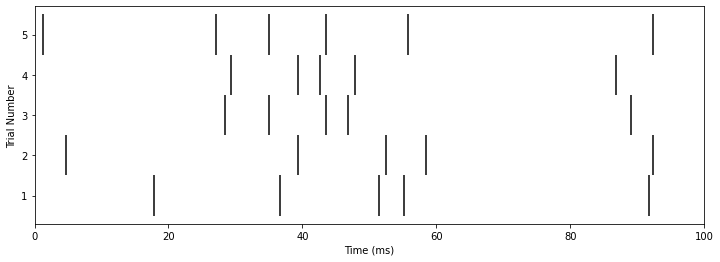

In [ ]:
n_trials = 5
trial_length = 100 # ms

# Set up spike time data
all_sp_time_list = [np.array([17.82, 36.63, 51.48, 55.11, 91.74]),
                    np.array([ 4.62, 39.27, 52.47, 58.41, 92.4]),
                    np.array([28.38, 34.98, 43.56, 46.86, 89.1]),
                    np.array([29.37, 39.27, 42.57, 47.85, 86.79]),
                    np.array([ 1.32, 27.06, 34.98, 43.56, 55.77, 92.4])]

# Make raster of this data
fig, ax = plt.subplots(1, 1, figsize=(12, 4))
ax.eventplot(all_sp_time_list, colors = 'black')

# Label x and y axes (with units!)
ax.set(xlabel = 'Time (ms)', 
       ylabel = 'Trial Number',
       xlim = [0, trial_length],
       ylim = [-.7, 4.7],
       yticks = [0, 1, 2, 3, 4],
       yticklabels = [1, 2, 3, 4, 5]);
glue("fig", fig, display=False)

````{admonition} **Coding Corner!** Plotting rasters in Python
:class: note, dropdown

We can create raster plots in matplotlib by using [`plt.eventplot`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.eventplot.html). 

The first argument is a list of arrays, where each array contains the spike times for that row of the raster. For example, if you are plotting multiple trials of one neuron, each array would contain the spike times of one trial. 

For example, in the raster plot created below, we have neural data for 5 trials for 100 ms per trial. The neuron spiked at 17.82 milliseconds, 36.63 ms, 51.48 ms, 55.41 ms, and 91.74 ms in trial 1. In trial 2, it spiked at 4.62 ms, 39.27 ms, 52.47 ms, 58.41 ms, and 92.4 ms.



```{code-block} python 
n_trials = 5
trial_length = 100 # ms

# Set up spike time data
all_sp_time_list = [np.array([17.82, 36.63, 51.48, 55.11, 91.74]),
                    np.array([ 4.62, 39.27, 52.47, 58.41, 92.4]),
                    np.array([28.38, 34.98, 43.56, 46.86, 89.1]),
                    np.array([29.37, 39.27, 42.57, 47.85, 86.79]),
                    np.array([ 1.32, 27.06, 34.98, 43.56, 55.77, 92.4])]

# Make raster of this data
fig, ax = plt.subplots(1, 1, figsize=(12, 4))
ax.eventplot(all_sp_time_list, colors = 'black')

# Label x and y axes (with units!)
ax.set(xlabel = 'Time (ms)', 
       ylabel = 'Trial Number',
       xlim = [0, trial_length],
       ylim = [-.7, 4.7],
       yticks = [0, 1, 2, 3, 4],
       yticklabels = [1, 2, 3, 4, 5]);
```
This code outputs the following plot
```{glue:figure} fig 
```
````

## Section 3: PSTHs

We can summarize the information over trials contained in a raster plot in a peri-stimulus time histogram (PSTH), also sometimes called a peri-event time histogram (PETH). In this plot, we want to show the average underlying firing rate over time. To do that, we need to use discrete chunks of time - we divide time into time bins of some length. 

For each time bin, we can then count the number of spikes in that time bin over all the trials. We can then get the average spikes/bin for that time bin during the trial as the the number of spikes divided by the number of trials. We can convert to spikes/second by dividing by the bin length in seconds.





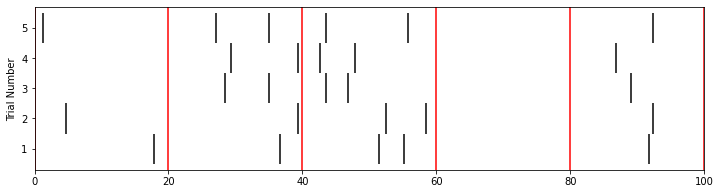

In [ ]:
# Define bin width
bin_width = 20

# Create bin edges
bin_edge_times = np.arange(0, trial_length+.1, bin_width)

fig, ax = plt.subplots(1, 1, figsize=(12, 3), sharex=True)

# Make raster of this data
ax.eventplot(all_sp_time_list, colors = 'black')
ax.set(ylabel = 'Trial Number',
      xlim = [0, trial_length],
      ylim = [-.7, 4.7],
      yticks = [0, 1, 2, 3, 4],
      yticklabels = [1, 2, 3, 4, 5]);

# Plot bin vertical lines 
for bin_time in bin_edge_times:
  ax.plot([bin_time, bin_time], [-.7, 4.7], 'r')


*Figure 3: Example raster plot with red vertical lines indicating 20 ms bins*

```{admonition} **Stop and think!** See Figure 3 to see a raster plot from 5 trials of neural data, where each trial is just 100 ms long. We want to compute a PSTH for this data with a bin width of 20 ms. On Figure 3, the red vertical lines denote the bin edges. What is the PSTH value in terms of spikes/seconds for the first 20 ms?
:class: tip, dropdown
There are 3 spikes in total in the first 20 ms. We divide 3 by the number of trials (5) and the bin length in seconds (.2) to get the firing rate in spikes/second.

3/(5*0.02) = 30




In [ ]:
# @markdown Click to see a solution

## Keep in mind there are lots of ways of doing this!

# Define bin width
bin_width = 20

# Create bin edges
bin_edge_times = np.arange(0, trial_length+.1, bin_width)

# Concatenate all spike times into one array
concat_spikes = np.concatenate(all_sp_time_list, axis=0),

# Get number of spikes in each bin
PSTH, _ = np.histogram(concat_spikes, bins=bin_edge_times) 

# Divide by number of trials and bin length to get spikes/second
PSTH = PSTH/(n_trials * (bin_width/1000))

print(PSTH)

[ 30.  80. 100.   0.  50.]


````{admonition} **Advanced Coding Challenge!** Using the data in all_sp_time_list (defined above), compute the PSTH for a bin size of 20 ms. Make PSTH an array of shape (n_bins, ), where each element is the firing rate in terms of spikes/second for that bin.
:class: note, dropdown

```{code-block} python 

## Keep in mind there are lots of ways of doing this!

# Define bin width
bin_width = 20

# Create bin edges
bin_edge_times = np.arange(0, trial_length+.1, bin_width)

# Concatenate all spike times into one array
concat_spikes = np.concatenate(all_sp_time_list, axis=0),

# Get number of spikes in each bin
PSTH, _ = np.histogram(concat_spikes, bins=bin_edge_times) 

# Divide by number of trials and bin length to get spikes/second
PSTH = PSTH/(n_trials * (bin_width/1000))

print(PSTH)
```
````

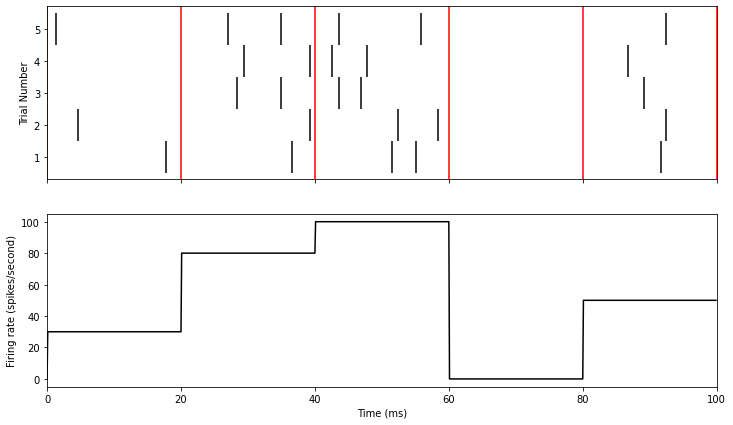

In [ ]:
# @markdown 

def plot_raster_and_PSTH(all_sp_time_list, bin_edge_times, PSTH):
  fig, axes = plt.subplots(2, 1, figsize=(12, 7), sharex=True)

  # Make raster of this data
  axes[0].eventplot(all_sp_time_list, colors = 'black')
  axes[0].set(ylabel = 'Trial Number',
        xlim = [0, trial_length],
        ylim = [-.7, 4.7],
        yticks = [0, 1, 2, 3, 4],
        yticklabels = [1, 2, 3, 4, 5]);

  # Plot bin vertical lines 
  for bin_time in bin_edge_times:
    axes[0].plot([bin_time, bin_time], [-.7, 4.7], 'r')

  # Plot PSTH
  x_vals = np.arange(0, trial_length, .1)
  y_vals = np.zeros((len(x_vals)))
  for i_bin in range(len(bin_edge_times) - 1):
    y_vals[(x_vals > bin_edge_times[i_bin]) & (x_vals <= bin_edge_times[i_bin + 1])] = PSTH[i_bin] 

  axes[1].plot(x_vals, y_vals,  'k');
  axes[1].set(xlabel = 'Time (ms)', 
              ylabel = 'Firing rate (spikes/second)');


# Define bin width
bin_width = 20

# Create bin edges
bin_edge_times = np.arange(0, trial_length+.1, bin_width)

# Concatenate all spike times into one array
concat_spikes = np.concatenate(all_sp_time_list, axis=0),

# Get number of spikes in each bin
PSTH, _ = np.histogram(concat_spikes, bins=bin_edge_times) 

# Divide by number of trials and bin length to get spikes/second
PSTH = PSTH/(n_trials * (bin_width/1000))

# Visualize
plot_raster_and_PSTH(all_sp_time_list, bin_edge_times, PSTH)

*Figure 3: PSTH (bottom row) constructed from a raster plot (top row) with a bin width of 5 ms.*

```{admonition} **Stop and think!** What would happen if you choose a bin width that's too big? Too small?
:class: tip, dropdown
Too big a bin and you might lose temporal information in the neural reponses because you're summing spikes over a long period of time. Too small a bin and the PSTH could be hard to interpret. For example, imagine if you chose a time bin small enough that there was almost always at most 1 spike in each, even across all trials. The PSTH would not convey much information. See Figures 4 and 5 to see too big a bin width and too small a bin width, respectively.

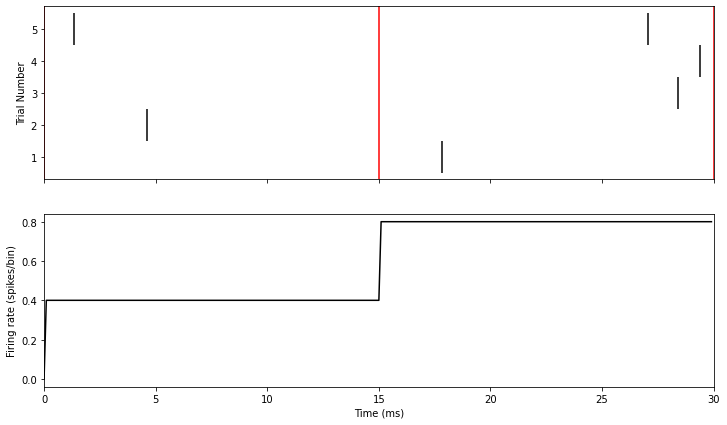

In [ ]:
# @markdown 

# Compute PSTH
bin_width = 15
bin_edge_times = np.arange(0, 30.1, bin_width)
binned_spikes, _ = np.histogram(np.concatenate(all_sp_time_list, axis=0), bins = bin_edge_times)

# Visualize
plot_raster_and_PSTH(all_sp_time_list, bin_edge_times, binned_spikes)

*Figure 4: PSTH (bottom row) constructed from a raster plot (top row) with a bin width of 15 ms. This bin width is too large and you lose a lot of temporal information!*

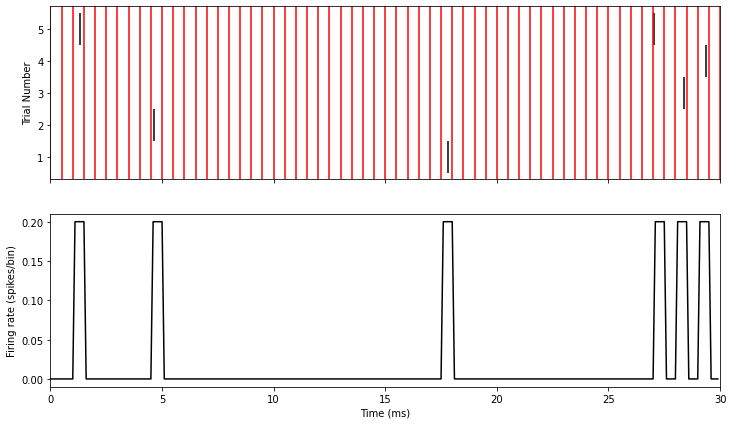

In [ ]:
# @markdown 

# Compute PSTH
bin_width = .5
bin_edge_times = np.arange(0, 30.1, bin_width)
binned_spikes, _ = np.histogram(np.concatenate(all_sp_time_list, axis=0), bins = bin_edge_times)

# Visualize
plot_raster_and_PSTH(all_sp_time_list, bin_edge_times, binned_spikes)

*Figure 5: PSTH (bottom row) constructed from a raster plot (top row) with a bin width of .5 ms. This bin width is too small - the PSTH conveys a lot about the exact spike timings in this set of trials but doesn't give us a sense of how the underlying firing rate is changing over time*

add interactive viz


Let's return to our proposed experiment. We have recorded the spike times of a motor neuron in a monkey while that monkey reaches in 8 different directions. We have plotted the raster plots given multiple trials of a reach in each direction, see Figure 6 below. 




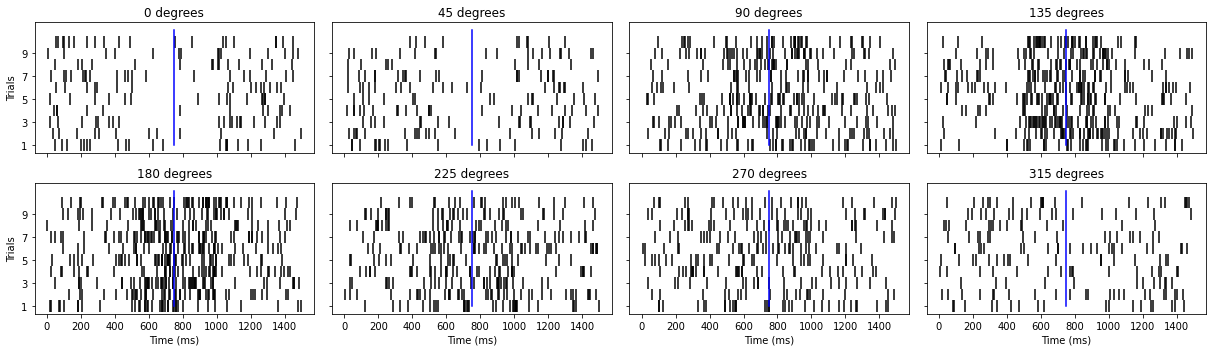

In [ ]:
# @markdown

np.random.seed(123)

# Set up parameters for faking data
n_trials = 10
angles = np.array([0, 45, 90, 135, 180, 225, 270, 315])
firing_rates = np.array([5, 8, 40, 54, 55, 38, 24, 8])

# Loop over angles & fake data
reach_sp_times = {}
for i_angle in range(8):
    reach_firing_rates = 15*np.ones((1500))
    reach_firing_rates[(750 - 250):(750 + 250)] = firing_rates[i_angle]

    bin_width = 1/1000

    all_sp_time_list = []
    for i_trial in range(n_trials):

        binned_spikes = np.random.poisson(reach_firing_rates * bin_width)
        sp_times = np.where(binned_spikes)[0]

        all_sp_time_list.append(sp_times)

    reach_sp_times[i_angle] = all_sp_time_list


# Visualize
fig, axes = plt.subplots(2, 4, figsize=(17, 5), sharex=True, sharey = True)
axes = axes.flatten()
for i_angle in range(8):

    axes[i_angle].eventplot(reach_sp_times[i_angle], colors = 'black')
    axes[i_angle].plot([750, 750], [0, 10], 'b')
    axes[i_angle].set(
       ylim = [-.7, 10.7],
       yticks = np.arange(0, 10, 2),
       yticklabels = np.arange(1, 11, 2),
       title = f'{angles[i_angle]} degrees');
    
    if angles[i_angle] > 135:
      axes[i_angle].set(xlabel = 'Time (ms)')
    if angles[i_angle] == 0 or angles[i_angle] == 180:
      axes[i_angle].set(ylabel = 'Trials')

plt.tight_layout()

*Figure 6: Raster plots of motor neuron response for 10 trials for each reach condition. Please note that this is faked data for illustrative purposes. The blue vertical line indicates the start of each reach.* 

```{admonition} **Stop and think!** Based on Figure 6, what directions of reach does this neuron fire a lot to? What directions of reach does it not respond for?
:class: tip, dropdown
The neuron fires a lot when the monkey is reaching at 135 and 180 degrees. It responds much less for 0 degrees and 315 degrees.